# Motivation zur Benutzung dieses Buches

Modellbildung und Simulation verbindet eine Vielzahl von Disziplinen, von grundlegender Mathematik über numerische Lösungsalgorithmen und Computernumerik hin zu der Syntax verschiedener Programmiersprachen. Dabei fällt es manchmal schwer, den Überblick zu behalten. Dieses Übungsbuch soll dabei helfen, die Modellbildung und Simulation durch ihre Schichten hindurch zu durchdringen und sie (be-)greifbar zu machen.

# Das Stauproblem

Als Beispiel hierfür nehmen wir uns eine sogenannte Extremwertaufgabe vor. Diese spielen in der Praxis oft eine große Rolle.

## Aufgabenstellung

Angenommen das Schweizer Verkehrsministerium macht eine Anfrage an Sie, die bestehenden Tempolimits Ihrer Autobahnen
zu überprüfen, unter dem konkreten Aspekt:

_"Wie können möglichst viele Fahrzeuge eine Engstelle, z.B. einen Tunnel passieren?"_

Nun ist Ihre Expertenmeinung gefragt!

## Parameterauswahl

Um diese Frage beantworten zu können, brauchen wir ein Modell. Aber welche *Größen* kommen dabei in Betracht? Zum Beispiel können wir uns fokussieren auf

- Länge und Geschwindigkeit der Fahrzeuge
- Zusammensetzung der Fahrzeugarten (PKW vs. LKW)
- Anzahl der Fahrspuren, Zu und Abfahrten
- Sichtverhältnisse, Fahrbahnbeschaffenheit
- (Sicherheits -)Abstand zwischen den Fahrzeugen
- ...und potentiell einige mehr.

## Modellreduktion

*Wie können alle Parameter in diesem Modell berücksichtigt werden?*

Das ist gar nicht unbedingt nötig, da ein Modell die
Natur aufs Nötig(st)e reduziert Wir vereinfachen daher weiter auf ein mathematisch behandelbares Optimierungsproblem unter den Annahmen

- die Fahrbahn sei einspurig
- alle Fahrzeuge seien PKWs gleicher Länge
- alle Fahrzeuge fahren mit der gleichen Geschwindigkeit
- alle Fahrer halten den gleichen Sicherheitsabstand ein

_(Ist für einen langen Tunnel in den Alpen nicht mal allzu unrealistisch...)_

```{admonition} MERKE
MERKE: Dies entspricht dem ersten Schritt im Lösungsschema von Extremwertaufgaben: "Vereinfachtes Modell der Natur erstellen"
```

## Mathematische Formulierung der Fragestellung

Was wir uns eigentlich fragen, ist: _Was ist besser...?_

1. Hohes Tempo = Großer Sicherheitsabstand

```{image} images/highv_highs.png
:alt: "high v high s"
:width: 800px
:align: center
```

oder

2. Niedriges Tempo Kleiner Sicherheitsabstand

```{image} images/lowv_lows.png
:alt: "low v low s"
:width: 800px
:align: center
```

Um eine mathematische Funktion für unser Tunnel Modell aufstellen zu können, müssen wir nur noch etwas konkreter fragen

_Bei welcher Geschwindigkeit ist der Verkehrsfluss F [Fzg./h]' d.h. die Anzahl der passierenden Fahrzeuge pro Stunde, am größten?_

Da wir das Modell bereits genügend vereinfacht haben, bleiben nur drei Variablen:

1. Geschwindigkeit $v$
2. Abstand $s$
3. Länge $L$

```{image} images/trafficvariables.png
:alt: "traffic variables"
:width: 800px
:align: center
```

Diese können wir in eine mathematische Funktion überführen.

$$F = F(v,s,L) = \frac{1000 v}{L+s}, F>0$$

```{admonition} MERKE
Dies entspricht dem zweiten Schritt im Schema zur Lösung von Extremwertaufgaben: "Die Ermittlung der Zielfunktion"
```

## Einschub: Definition und Sätze zu Extremwerten

*Definition*: Ein _lokales Maximum (Minimum)_ ist der Wert der Funktion $f$ an einer Stelle $x_0$, wenn in einer $\varepsilon$ Umgebung von $x_0$ die Funktion keine größeren (kleineren) Werte annimmt.

*Notwendige Bedingung für ein lokales Extremum:* Die differenzierbare Funktion $f$ besitzt in $x_0$ eine waagerechte Tangente, d.h. $f'(x_0)=0$.

*Hinreichende Bedingung für ein lokales Extremum:* Gilt für die mindestens zweimal differenzierbare Funktion $f$

1. $f'(x_0)=0$ und $f''(x_0)<0$, dann hat $f$ dort ein _lokales Maximum_.
2. $f'(x_0)=0$ und $f''(x_0)>0$, dann hat $f$ dort ein _lokales Minimum_.

## Konstruktion von Nebenbedingungen

Um die Gleichung besser lösen zu können, können wir _Nebenbedingungen_ konstruieren, welche die Variablen in Beziehung zueinander setzen:

1. Lege die Fahrzeuglänge $L$ als Konstante fest, z.B. $L=4.5 m$.
2. Für den Sicherheitsabstand kennen wir aus der Fahrschule die Faustregeln
- "Bremsweg-Regel" $s = s(v) = \frac{v}{10}\cdot\frac{v}{10} = \frac{v^2}{100}$
- "Tacho-Halbe-Regel" $s = s(v) = \frac{v}{2}$

Mithilfe der "Bremsweg-Regel" und der Konstanten Fahrzeuglänge vereinfachen wir die Funktion zu

$$\max{F(v) = \frac{1000v}{4.5 + \frac{v^2}{100}}}, v\in[0,\infty)$$

```{admonition} MERKE
Dies entspricht dem dritten Schritt im Lösungsschema:
"Eliminierung von Variablen durch Nebenbedingungen"
```

## Mathematische Lösung des Modells

Für die Gleichung setzen wir also $F' = 0$ und $F'' < 0$:

$$
\begin{align}
F'(v) = \frac{(4.5 + \frac{v^2}{100})\cdot 1000 - 1000 v \frac{2v}{100}}{(4.5 + \frac{v^2}{100})^2} &= 0\\
\rightarrow 4500 - 10 v^2 &= 0\\
\rightarrow v_{1/2} &= \pm \sqrt{450} = \pm 21.21
\end{align}
$$

Prüfung mit $F''(v_{1/2})$ zeigt, dass für $v_1 = +21.21$ ein lokales Maximum vorliegt.

```{admonition} MERKE
Dies entspricht dem vierten Schritt im Lösungsschema: "Bestimmung der lokalen Extremstellen"
```

Es bleiben noch zwei letzte Tests:

1. Liegt die oben errechnete Lösung im Definitionsbereich von $F$? $\rightarrow$ JA!
2. Am Rand des Definitionsbereichs könnten noch (globale) "Randextrama" liegen. Ist dies hier der Fall? $\rightarrow$ NEIN!

Das Ganze geht auch ganz einfach in Octave:

In [6]:
F = @(V) -(1000*V)./(4.5 + (V.^2)/100); % set F as negative to be able to use minimise function
x = fminbnd (F, 0, 200)

x = 21.213


```{admonition} MERKE
Dies entspricht dem vierten Schritt im Lösungsschema: "Gültigkeits und Randstellen Prüfung"
```

Damit erhalten wir die *Lösung*: Bei $v=21.21 \frac{km}{h}$ wird ein maximaler Fahrzeugdurchsatz von $F(21.21 km/h) = 2357 \frac{Fahrzeuge}{h}$ erreicht.

## Ingenieurs-Know-How

Bevor wir die Ergebnisse an das Schweizer Verkehrsministerium übergeben, müssen wir zuletzt noch fragen: _Als wie realistisch schätzen wir diese Lösung ein?_

Dazu variieren wir die Faustformel für den Sicherheitsabstand zur "Tacho-Halbe-Regel". Daraus ergibt sich

$$F(v) = \frac{1000 v}{4.5 + \frac{v}{2}}$$

$$F'(v) = \frac{\left(4.5 + \frac{v}{2}\right)\cdot 1000 - 1000 v \cdot \frac{1}{2}}{\left(4.5 + \frac{v}{2}\right)^2} = 0 \rightarrow 4500 = 0$$

$F$ hat also keine _lokalen Extrema_. Die Überprüfung der Randstellen liefert

1. $F(0)=0$
2. $\lim_{v\to\infty}{F(v)}=\lim_{v\to\infty}{\frac{1000v}{4.5 + \frac{v}{2}}} \to 2000$

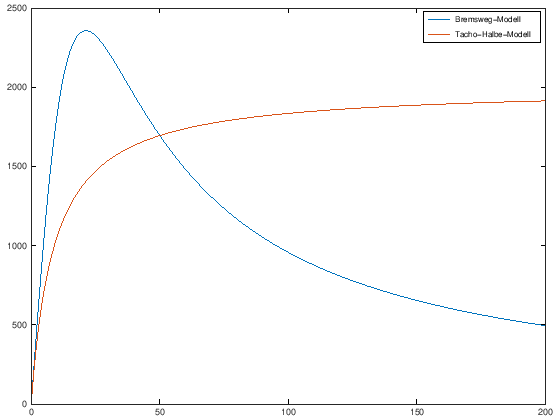

In [7]:
% graphische Darstellung von F(v) für beide Abstandsmodelle
graphics_toolkit("gnuplot")

vmax = 200;
dv = 1;
v = linspace(0,vmax,vmax*dv);
L = 4.5;
s_bremsweg = (v.^2)/100;
F_bremsweg = (1000*v)./(L + s_bremsweg);
s_tachohalbe = v/2;
F_tachohalbe = (1000*v)./(L + s_tachohalbe);

plot(v,F_bremsweg,v,F_tachohalbe)

h = legend ("Bremsweg-Modell", "Tacho-Halbe-Modell");
legend (h, "location", "northeast");

Die Modelle liefern also sehr unterschiedliche Ergebnisse, mit denen wir noch nicht voll zufrieden sein können. Daraus ergibt sich die Frage:

_Können wir einfachen Mitteln zu einer deutlich realistischeren Beschreibung des Problems kommen?_

Die Antwort: Ja, durch etwas mehr Gehirnschmalz
und Einsatz von ein wenig mehr Physik.

## Verbesserung des Modells

1. Mehr Physik\
Tatsächlich besteht der Anhalteweg u.a. aus dem Reaktionsweg und dem Bremsweg. Letzterer kann mit dem realen Beschleunigungsgesetz genauer berechnet werden: $s_B = \frac{v^2}{2a}$ (Verzögerung $a$ = _negative Beschleunigung_!)

2. Mehr Gehirnschmalz\
Bisher wird beim Sicherheitsabstand so getan, als ob im Bremsfall der Vorfahrende instantan von $v$ auf $0$ stoppt. Dessen Bremsweg $s_{VF} = \frac{v^2}{2a_{VF}}$ wird in der Fahrpraxis oft vom eigenen Bremsweg abgezogen.

```{image} images/Bremsvorgang.svg
:alt: "Quelle: Wikipedia"
:width: 800px
:align: center
```

Wenn man beides berücksichtigt, ergibt sich mit Hilfe der Reaktionszeit $t_R$ und der Verzögerung $a$ als neuer Sicherheitsabstand $s$ ($v$ muss in unserem Fall von $km/h$ auf $m/s$ umgerechnet werden:

$$s = s(v,a_{selbst},a_{VF},t_R)=\frac{v}{3.6}\cdot t_R + \frac{\left(\frac{v}{3.6}\right)^2}{2\cdot a_{selbst}} - \frac{\left(\frac{v}{3.6}\right)^2}{2\cdot a_{VF}}$$

Wieder müssen wir mit Nebenbedingungen (hier: Konstanten) das Problem vereinfachen:

1. $t_R=1s$
2. $a=30 m/s^2$

maxF = 2460.8
bestv = 71


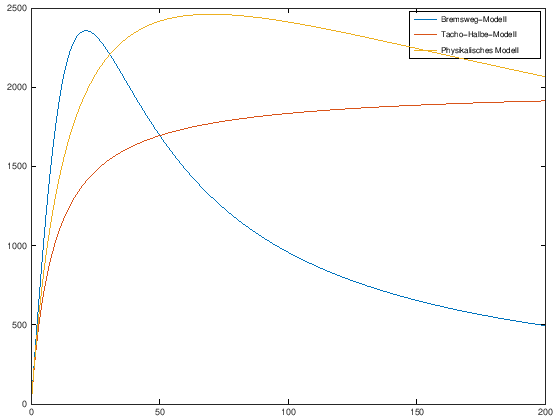

In [26]:
% graphische Darstellung von F(v) für die drei Abstandsmodelle
graphics_toolkit("gnuplot")

vmax = 200;
dv = 1;
v = linspace(0,vmax,vmax*dv);
L = 4.5;
s_bremsweg = (v.^2)/100;
F_bremsweg = (1000*v)./(L + s_bremsweg);
s_tachohalbe = v/2;
F_tachohalbe = (1000*v)./(L + s_tachohalbe);

t_R = 1;
a_selbst = 6;
a_VF = 7;
s_physik = v/3.6*t_R + (v/3.6).^2/(2*a_selbst) - (v/3.6).^2/(2*a_VF);
F_physik = (1000*v)./(L + s_physik);

[maxF,bestv] = max(F_physik);
maxF
bestv = bestv/dv

plot(v,F_bremsweg,v,F_tachohalbe,v,F_physik)

h = legend ("Bremsweg-Modell", "Tacho-Halbe-Modell", "Physikalisches Modell");
legend (h, "location", "northeast");

## Zusammenfassung

Das Lösen von solchen Extremwertaufgaben besteht also aus fünf Schritten, die wir alle hier kennengelernt haben:

1. Vereinfachtes Modell der Natur erstellen
2. Die Ermittlung der Zielfunktion
3. Eliminierung von Variablen durch Nebenbedingungen
4. Bestimmung der lokalen Extremstellen
5. Gültigkeits- und Randstellen-Prüfung

Außerdem haben wir eine wichtige Lektion gelernt:

***Für eine gute Simulation ist ein Bewusstsein für die Modellannahmen entscheident.***

## Ausblick: Simulation mit finiten Volumen

Im letzten Kapitel dieses Übungsbuches werden wir lernen partielle Differentialgleichungen (PDEs) zu lösen. Damit können wir auch unser Verkehrsmodell wesentlich realistischer Lösen.

In [8]:
%-- mit FV WENO-Verfahren 3. Ordnung
clear all
%--
global u_max rho_max rho_krit c
u_max = 50; % 180 km/h
rho_max = 1/6; % 1 Auto auf 6 m
rho_krit = 1/100; 
c = u_max/log(rho_krit/rho_max);
global x dx n
n = 100; dx = 100000/n;
x = linspace(dx/2, 100000-dx/2, n); %-- Zellenmittelpunkte

%-- Options for initial situation
%-- Stauauflösung
y0 = 0.1*exp(-1.0e-6*(x-10000).^2); tspan = [0, 6000];
%-- Ampel gruen
%y0 = 0*x; ff = find(x < 50000); y0(ff)=1/6; tspan = [0, 900];
%-- Ampel rot
%y0 = 0*x+1/100; ff = find(x > 70000); y0(ff)=1/6; tspan = [0, 1400];

%-- Integrator
tol = 1.0e-4;
options=odeset('Stats','on','RelTol',tol,'AbsTol',tol);
% graphical output does not work in Octave, download the file and include
%"'OutputFcn'%,@plot_sol" in odeset()
tic
[t,y] = ode45(@dgl,tspan,y0,options);
toc
nt = length(t)

function dy = dgl(t,y)
    global x dx n
    %--
    nord = 3;
    rho = y'; % Zellenmittelwerte 1,..,n als Zeilenvektor
    [rhoL,rhoR]=mc_extrapol(rho);  % rho auf x_1/2 bzw. x_n+1/2 extrapolieren
    rho = [rhoL,rho,rhoR];
    [rho_m,rho_p]=mc_recover_pcweno(rho,nord);  % Werte auf Zellgrenzen interpolieren
    u_m = uvonrho(rho_m); u_p = uvonrho(rho_p); 
    q_m = u_m.*rho_m; q_p = u_p.*rho_p; 
    lam_m = eigen(rho_m,u_m); lam_p = eigen(rho_p,u_p);
    f_r = 0;
    for i=1:n+1  % durchlaufe alle Zellgrenzen, der Fluss auf Grenze i heißt f_r
        f_l = f_r;
        lambda = max(lam_m(i),lam_p(i)); 
        f_r = 0.5*( q_m(i)+q_p(i) - lambda*( rho_p(i)-rho_m(i) ) );
        if (i==1) f_r=0; end %-- linke RB
        if (i==n+1 && f_r > 1/3)
            f_r = 1/3;
        end
        if (i>1)
          dy(i-1,1) = -(f_r-f_l)/dx;
        end
    end
endfunction

function status=plot_sol(t,y,flag)
    global x dx n
    global line_rho line_u
    %--
    if strcmp(flag,'done') 
        status=0; hold off; return; 
    end
    rho = y(:,end); u = uvonrho(rho);
    if strcmp(flag,'init')
    %   subplot(1,2,1)
       axis([x(1), x(n), -0.1, 170]);
       line_rho = line(x, rho*1000,   'Color','red');
       line_u   = line(x, u  ,   'Color','blue');
    else
        tt = t(end);
       set(line_rho,'ydata',rho*1000);
       set(line_u  ,'ydata',u);
    end
    status=0;
    legend('1000*\rho','u');
    pause(0.1);
    drawnow
endfunction

function u = uvonrho(rho)
    global u_max rho_max rho_krit c
    %--
    u = 0*rho+u_max;
    ff = find(rho > rho_krit); u(ff) = c*log(rho(ff)/rho_max);
    ff = find(rho > rho_max);  u(ff)=0;
endfunction

function lam = eigen(rho,u)
    global u_max rho_max rho_krit c
    %--
    lam = u;
    ff = find((rho > rho_krit)&(rho < rho_max)); lam(ff) = lam(ff)+c;
    lam=abs(lam);
endfunction

function [yL,yR]=mc_extrapol(y)
    %-- Extrapoliere Zellenmittel y der Länge n auf Zellgrenze i=1/2 (=yL) und i=n+1/2 (=yR),
    n = length(y);
    yR = (3*y(n)-y(n-1))/2; yL=(3*y(1)-y(2))/2; %-- lineare Extrap.
endfunction

function [yL,yR]=mc_recover_pcweno(y,nord)
    %-- Interpoliere Zellenmittelwerte y_i auf Zellgrenzen y_i+1/2
    %-- y enthält y_1/2, y_1,...,y_nx,y_nx+1/2
    %-- yL enthaelt  y_1/2^-,...,y_nx+1/2^-
    %-- yR enthaelt  y_1/2^+,...,y_nx+1/2^+
    n = length(y);
    i = 1:n-1; ip1=2:n; im1=[1,1:n-2]; ip2=[3:n,n]; 
    %-- nx = 1 
    if n==3
        yL = [y(1),y(3)]; yR = yL;
        return
    end
    %-- Extrapolation vom Rand in die Mitte auf -dx/2 bzw. (n+1)*dx
      yL_save = y(1); yR_save = y(n);
      y(1) = 2*y(1) - y(2); y(n) = 2*y(n) - y(n-1);
    %---- nord = 1
    yR = y(ip1); yL = y(i);   
    if nord==2
      sL = y(ip1)-y(i); sR = y(ip2)-y(ip1);  
      r = sL./sR;
      yR = y(ip1) - 0.5*limiter(r).*sR;
    %--
      sR = sL; sL = y(i)-y(im1); 
      r = sL./sR;
      yL = y(i) + 0.5*limiter(r).*sR;
    %-- Randkorrektur
      yL(1) = yL_save; yR(n-1) = yR_save;
      yR(1) = yL_save; yL(n-1) = yR_save; 
    elseif nord==3
      ep = 1.0e-6; p = 0.6; 
      uL = y(ip1)-y(i); uC = y(ip2)-2*y(ip1)+y(i); uR = y(ip2)-y(ip1); uCC = y(ip2)-y(i);
      ISL = uL.^2; ISC = 13/3*uC.^2 +0.25*uCC.^2; ISR = uR.^2;
      aL = 0.25*(1./(ep+ISL)).^p; aC = 0.5*(1./(ep+ISC)).^p; aR = 0.25*(1./(ep+ISR)).^p;
      suma = max(aL+aC+aR,eps);  wL = aL./suma; wC = aC./suma; wR = aR./suma;
      weights = [0.5*wL + 5/12*wC; 0.5*wL+2/3*wC+1.5*wR ;  -wC/12-0.5*wR];
      yR = y(i).*weights(1,:) + y(ip1).*weights(2,:) +y(ip2).*weights(3,:);
    %--
      uR = uL; uL = y(i)-y(im1); uC = y(ip1)-2*y(i)+y(im1); uCC = y(ip1)-y(im1);
      ISL = uL.^2; ISC = 13/3*uC.^2 +0.25*uCC.^2; ISR = uR.^2;
      aL = 0.25*(1./(ep+ISL)).^p; aC = 0.5*(1./(ep+ISC)).^p; aR = 0.25*(1./(ep+ISR)).^p;
      suma = max(aL+aC+aR,eps);  wL = aL./suma; wC = aC./suma; wR = aR./suma;
      weights = [weights; -0.5*wL-wC/12; 1.5*wL+2/3*wC+0.5*wR; 5/12*wC+0.5*wR];
      yL = y(im1).*weights(4,:) + y(i).*weights(5,:) + y(ip1).*weights(6,:);
    %-- Randkorrektur
      yL(1) = yL_save; yR(n-1) = yR_save;
      yR(1) = yL_save; yL(n-1) = yR_save; 
    end
endfunction

function s = limiter(r)
  r = min(5,max(0,r));
  s = (r.^2+r)./(r.^2+1);  % van Albada
endfunction

Number of successful steps: 179
Number of failed attempts:  56
Number of function calls:   1411
Elapsed time is 3.86436 seconds.
nt = 180


    __gnuplot_legend__ at line 437 column 9
    legend at line 198 column 37



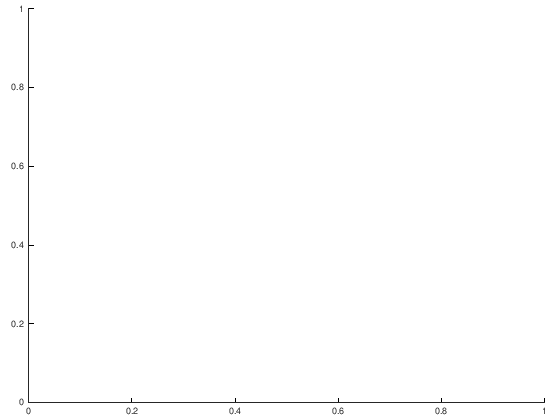

In [5]:
graphics_toolkit("gnuplot")
plot(y)

### Graphische Darstellung

Leider funktioniert die dynamische graphische Darstellung in Octave nicht. Stattdessen können Sie den unten stehenden Code herunterladen und in MATLAB ausführen.

In [ ]:
function autobahn
%-- mit FV WENO-Verfahren 3. Ordnung
clear all
%--
global u_max rho_max rho_krit c
u_max = 50; % 180 km/h
rho_max = 1/6; % 1 Auto auf 6 m
rho_krit = 1/100; 
c = u_max/log(rho_krit/rho_max);
global x dx n
n = 100; dx = 100000/n;
x = linspace(dx/2, 100000-dx/2, n); %-- Zellenmittelpunkte
%-- Steuauflösung
y0 = 0.1*exp(-1.0e-6*(x-10000).^2); tspan = [0, 6000];
%-- Ampel gruen
%y0 = 0*x; ff = find(x < 50000); y0(ff)=1/6; tspan = [0, 900];
%-- Ampel rot
%y0 = 0*x+1/100; ff = find(x > 70000); y0(ff)=1/6; tspan = [0, 1400];
%-- Integrator
tol = 1.0e-4;
options=odeset('Stats','on','RelTol',tol,'AbsTol',tol,'OutputFcn',@plot_sol);
tic
[t,y] = ode45(@dgl,tspan,y0,options);
toc
nt = length(t)

function dy = dgl(t,y)
global x dx n
%--
nord = 3;
rho = y'; % Zellenmittelwerte 1,..,n als Zeilenvektor
[rhoL,rhoR]=mc_extrapol(rho);  % rho auf x_1/2 bzw. x_n+1/2 extrapolieren
rho = [rhoL,rho,rhoR];
[rho_m,rho_p]=mc_recover_pcweno(rho,nord);  % Werte auf Zellgrenzen interpolieren
u_m = uvonrho(rho_m); u_p = uvonrho(rho_p); 
q_m = u_m.*rho_m; q_p = u_p.*rho_p; 
lam_m = eigen(rho_m,u_m); lam_p = eigen(rho_p,u_p);
f_r = 0;
for i=1:n+1  % durchlaufe alle Zellgrenzen, der Fluss auf Grenze i heißt f_r
    f_l = f_r;
    lambda = max(lam_m(i),lam_p(i)); 
    f_r = 0.5*( q_m(i)+q_p(i) - lambda*( rho_p(i)-rho_m(i) ) );
    if (i==1) f_r=0; end %-- linke RB
    if (i==n+1 && f_r > 1/3)
        f_r = 1/3;
    end
    if (i>1)
      dy(i-1,1) = -(f_r-f_l)/dx;
    end
end

function status=plot_sol(t,y,flag)
global x dx n
global line_rho line_u
%--
if strcmp(flag,'done') 
    status=0; hold off; return; 
end
rho = y(:,end); u = uvonrho(rho);
if strcmp(flag,'init')
%   subplot(1,2,1)
   axis([x(1), x(n), -0.1, 170]);
   line_rho = line(x, rho*1000,   'Color','red');
   line_u   = line(x, u  ,   'Color','blue');
else
    tt = t(end);
   set(line_rho,'ydata',rho*1000);
   set(line_u  ,'ydata',u);
end
status=0;
legend('1000*\rho','u');
pause(0.1);
drawnow

function u = uvonrho(rho)
global u_max rho_max rho_krit c
%--
u = 0*rho+u_max;
ff = find(rho > rho_krit); u(ff) = c*log(rho(ff)/rho_max);
ff = find(rho > rho_max);  u(ff)=0;

function lam = eigen(rho,u)
global u_max rho_max rho_krit c
%--
lam = u;
ff = find((rho > rho_krit)&(rho < rho_max)); lam(ff) = lam(ff)+c;
lam=abs(lam);

function [yL,yR]=mc_extrapol(y)
%-- Extrapoliere Zellenmittel y der Länge n auf Zellgrenze i=1/2 (=yL) und i=n+1/2 (=yR),
n = length(y);
yR = (3*y(n)-y(n-1))/2; yL=(3*y(1)-y(2))/2; %-- lineare Extrap.

function [yL,yR]=mc_recover_pcweno(y,nord)
%-- Interpoliere Zellenmittelwerte y_i auf Zellgrenzen y_i+1/2
%-- y enthält y_1/2, y_1,...,y_nx,y_nx+1/2
%-- yL enthaelt  y_1/2^-,...,y_nx+1/2^-
%-- yR enthaelt  y_1/2^+,...,y_nx+1/2^+
n = length(y);
i = 1:n-1; ip1=2:n; im1=[1,1:n-2]; ip2=[3:n,n]; 
%-- nx = 1 
if n==3
    yL = [y(1),y(3)]; yR = yL;
    return
end
%-- Extrapolation vom Rand in die Mitte auf -dx/2 bzw. (n+1)*dx
  yL_save = y(1); yR_save = y(n);
  y(1) = 2*y(1) - y(2); y(n) = 2*y(n) - y(n-1);
%---- nord = 1
yR = y(ip1); yL = y(i);   
if nord==2
  sL = y(ip1)-y(i); sR = y(ip2)-y(ip1);  
  r = sL./sR;
  yR = y(ip1) - 0.5*limiter(r).*sR;
%--
  sR = sL; sL = y(i)-y(im1); 
  r = sL./sR;
  yL = y(i) + 0.5*limiter(r).*sR;
%-- Randkorrektur
  yL(1) = yL_save; yR(n-1) = yR_save;
  yR(1) = yL_save; yL(n-1) = yR_save; 
elseif nord==3
  ep = 1.0e-6; p = 0.6; 
  uL = y(ip1)-y(i); uC = y(ip2)-2*y(ip1)+y(i); uR = y(ip2)-y(ip1); uCC = y(ip2)-y(i);
  ISL = uL.^2; ISC = 13/3*uC.^2 +0.25*uCC.^2; ISR = uR.^2;
  aL = 0.25*(1./(ep+ISL)).^p; aC = 0.5*(1./(ep+ISC)).^p; aR = 0.25*(1./(ep+ISR)).^p;
  suma = max(aL+aC+aR,eps);  wL = aL./suma; wC = aC./suma; wR = aR./suma;
  weights = [0.5*wL + 5/12*wC; 0.5*wL+2/3*wC+1.5*wR ;  -wC/12-0.5*wR];
  yR = y(i).*weights(1,:) + y(ip1).*weights(2,:) +y(ip2).*weights(3,:);
%--
  uR = uL; uL = y(i)-y(im1); uC = y(ip1)-2*y(i)+y(im1); uCC = y(ip1)-y(im1);
  ISL = uL.^2; ISC = 13/3*uC.^2 +0.25*uCC.^2; ISR = uR.^2;
  aL = 0.25*(1./(ep+ISL)).^p; aC = 0.5*(1./(ep+ISC)).^p; aR = 0.25*(1./(ep+ISR)).^p;
  suma = max(aL+aC+aR,eps);  wL = aL./suma; wC = aC./suma; wR = aR./suma;
  weights = [weights; -0.5*wL-wC/12; 1.5*wL+2/3*wC+0.5*wR; 5/12*wC+0.5*wR];
  yL = y(im1).*weights(4,:) + y(i).*weights(5,:) + y(ip1).*weights(6,:);
%-- Randkorrektur
  yL(1) = yL_save; yR(n-1) = yR_save;
  yR(1) = yL_save; yL(n-1) = yR_save; 
end

function s = limiter(r)
  r = min(5,max(0,r));
  s = (r.^2+r)./(r.^2+1);  % van Albada